In [1]:
%matplotlib notebook
#Load required stuff
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt


   # This notebook documents the calculations used for shielding calculations using the FREIA_baseline.instr McStas model
  
    

The FREIA baseline model was updated in April 2021 

-updated some of the monitor names and added some PSD monitors along the instrument.


FREIA instrument files maintained by Tom Arnold (Tom.Arnold@ess.eu) with support from Kalliopi.Kanaki@esss.eu and Andrew.Jackson@ess.eu.

The baseline model is now: FREIA_baseline.instr. It compiles with McStas 2.5.

The model needs an NCrystal installation to compile and run. The NCrystal_sample.comp is used to add the guide and BM aluminium windows. Instructions on how to install the NCrystal library and make it locally available in the mcstas running dir can be found here:

https://github.com/mctools/ncrystal/wiki

Alternatively the NCrystal elements (beamline windows) can be commented out to run a simulation. The model also includes some mcpl output monitors which produce very large files and can be commented out for the sake of data storage.

Various simulations have been performed to facilitate the neutronics shielding calculations:

-Full-divergence mode with all choppers in operation

-Full-divergence mode with only WBC choppers in operation (WFM1-2 and FOC1-3 are parked open)

-Full-divergence mode with no choppers in operation (All choppers are parked open)

In this mode the beam delivered by the elliptical guide is not substantially collimated and transports the natural focus of the ellipse onto the sample. Since the source is relatively large this results in a poorly focused beam at the sample position with a divergence of approximately 4 degrees. The state of the beamline components for this mode are : 

(i) the collimation slit set at 2.275 m (s1) is open to the size of the guide (30 mm (w) x 150 mm (h)), 

(ii) the collimation slit set at 0.375 m (s2) is open to the size of the guide (30 mm (w) x 65 mm (h))
 



In [2]:
#Setup dir variables
%cd '/Users/thomasarnold/Documents/McStas_tom/h1h2_sims/'

#the full beam divergence mode with no sample in place
#the slit apertures in the model are defined by the desired incident angle, the angular resolution and the footprint
#therefore to open the slits fully as described above we need to use the following parameters:
#Slits_angle=1.95 angres=1.662 footprint=3.16
# this produces the following slit apertures
#------------------S1 height =0.150116 m 
#------------------S2 height =0.0650578 m 


#Full-divergence mode with all choppers in operation
#mcrun -n 1e10 -g --mpi=8 -d freia_baseline_allchoppers FREIA_baseline.instr stopWFM=0 stopWBC=0 sample=0 L_min=0.2 L_max=40 L_pol=0.700406 s1ax=0.015 s2ax=0.015 Slits_angle=1.95 angres=1.662 footprint=3.16
chop_dir = 'freia_baseline_allchoppers'

#Full-divergence mode with only WBC choppers in operation (WFM1-2 and FOC1-3 are parked open)
#mcrun -n 1e10 -g --mpi=8 -d freia_baseline_nowfm FREIA_baseline.instr stopWFM=1 stopWBC=0 sample=0 L_min=0.2 L_max=40 L_pol=0.700406 s1ax=0.015 s2ax=0.015 Slits_angle=1.95 angres=1.662 footprint=3.16
nowfm_dir = 'freia_baseline_nowfm'

#Full-divergence mode with no choppers in operation (All choppers are parked open)
#mcrun -n 1e10 -g --mpi=8 -c -d freia_baseline_nowbc FREIA_baseline.instr stopWFM=1 stopWBC=1 sample=0 L_min=0.2 L_max=40 L_pol=0.700406 s1ax=0.015 s2ax=0.015 Slits_angle=1.95 angres=1.662 footprint=3.16
nowbc_dir = 'freia_baseline_nowbc'



/Users/thomasarnold/Documents/McStas_tom/h1h2_sims


In [3]:
#Relevant McStas monitors

#TOF at the sample position (or rather the exit of S2)
(plot2_nowbc_tof,plot2_nowbc_i,plot2_nowbc_ierr) = np.loadtxt(nowbc_dir+"/S2TOF.dat",usecols=(0,1,2),unpack=True)
(plot2_nowfm_tof,plot2_nowfm_i,plot2_nowfm_ierr) = np.loadtxt(nowfm_dir+"/S2TOF.dat",usecols=(0,1,2),unpack=True)
(plot2_chop_tof,plot2_chop_i,plot2_chop_ierr) = np.loadtxt(chop_dir+"/S2TOF.dat",usecols=(0,1,2),unpack=True)

#wavelength at the sample position
(plot3lambda_nowbc_lambda,plot3lambda_nowbc_i,plot3lambda_nowbc_ierr) = np.loadtxt(nowbc_dir+"/SampleLambda.dat",usecols=(0,1,2),unpack=True)
(plot3lambda_nowfm_lambda,plot3lambda_nowfm_i,plot3lambda_nowfm_ierr) = np.loadtxt(nowfm_dir+"/SampleLambda.dat",usecols=(0,1,2),unpack=True)
(plot3lambda_chop_lambda,plot3lambda_chop_i,plot3lambda_chop_ierr) = np.loadtxt(chop_dir+"/SampleLambda.dat",usecols=(0,1,2),unpack=True)

#Flux at heavy shutter (inside the bunker)
#ShutterPSD.dat
plot4a_nowbc = np.genfromtxt(nowbc_dir+"/ShutterPSD.dat",skip_footer=200)
plot4a_nowfm = np.genfromtxt(nowfm_dir+"/ShutterPSD.dat",skip_footer=200)
plot4a_chop = np.genfromtxt(chop_dir+"/ShutterPSD.dat",skip_footer=200)

#Flux at bunker exit
#BunkerExitPSD.dat
plot4b_nowbc = np.genfromtxt(nowbc_dir+"/BunkerExitPSD.dat",skip_footer=200)
plot4b_nowfm = np.genfromtxt(nowfm_dir+"/BunkerExitPSD.dat",skip_footer=200)
plot4b_chop = np.genfromtxt(chop_dir+"/BunkerExitPSD.dat",skip_footer=200)

#Flux at cave entrance
#CavePSD.dat
plot4c_nowbc = np.genfromtxt(nowbc_dir+"/CavePSD.dat",skip_footer=200)
plot4c_nowfm = np.genfromtxt(nowfm_dir+"/CavePSD.dat",skip_footer=200)
plot4c_chop = np.genfromtxt(chop_dir+"/CavePSD.dat",skip_footer=200)

#or after the m=6 guide (guide_pol)
#GuideexitPSD.dat
plot4d_nowbc = np.genfromtxt(nowbc_dir+"/GuideexitPSD.dat",skip_footer=200)
plot4d_nowfm = np.genfromtxt(nowfm_dir+"/GuideexitPSD.dat",skip_footer=200)
plot4d_chop = np.genfromtxt(chop_dir+"/GuideexitPSD.dat",skip_footer=200)

#Flux at sample position
#PSD at sample position perpendicular to the beam (guide tilt)... i.e. not truely vertical!
plot4e_nowbc = np.genfromtxt(nowbc_dir+"/VerticalPSDSample.dat",skip_footer=200)
plot4e_nowfm = np.genfromtxt(nowfm_dir+"/VerticalPSDSample.dat",skip_footer=200)
plot4e_chop = np.genfromtxt(chop_dir+"/VerticalPSDSample.dat",skip_footer=200)

#or PSD at S2 exit (approx 0.37m from sample position)
plot4g_nowfm = np.genfromtxt(nowfm_dir+"/SampleSlit2PSD.dat",skip_footer=200)
plot4g_nowbc = np.genfromtxt(nowbc_dir+"/SampleSlit2PSD.dat",skip_footer=200)
plot4g_chop = np.genfromtxt(chop_dir+"/SampleSlit2PSD.dat",skip_footer=200)



#some other useful monitors...
#divergence of the beam at the sample position relative to the horizontal plane
plot1_nowbc = np.genfromtxt(nowbc_dir+"/HorDivLamSample.dat",skip_footer=4000)
plot1b_nowbc = np.genfromtxt(nowbc_dir+"/HorDivposSample.dat",skip_footer=400)
#PSD at sample position in the horizontal plane
plot0b_nowbc = np.genfromtxt(nowbc_dir+"/HorizontalPSDsample.dat",skip_footer=200)


<IPython.core.display.Javascript object>


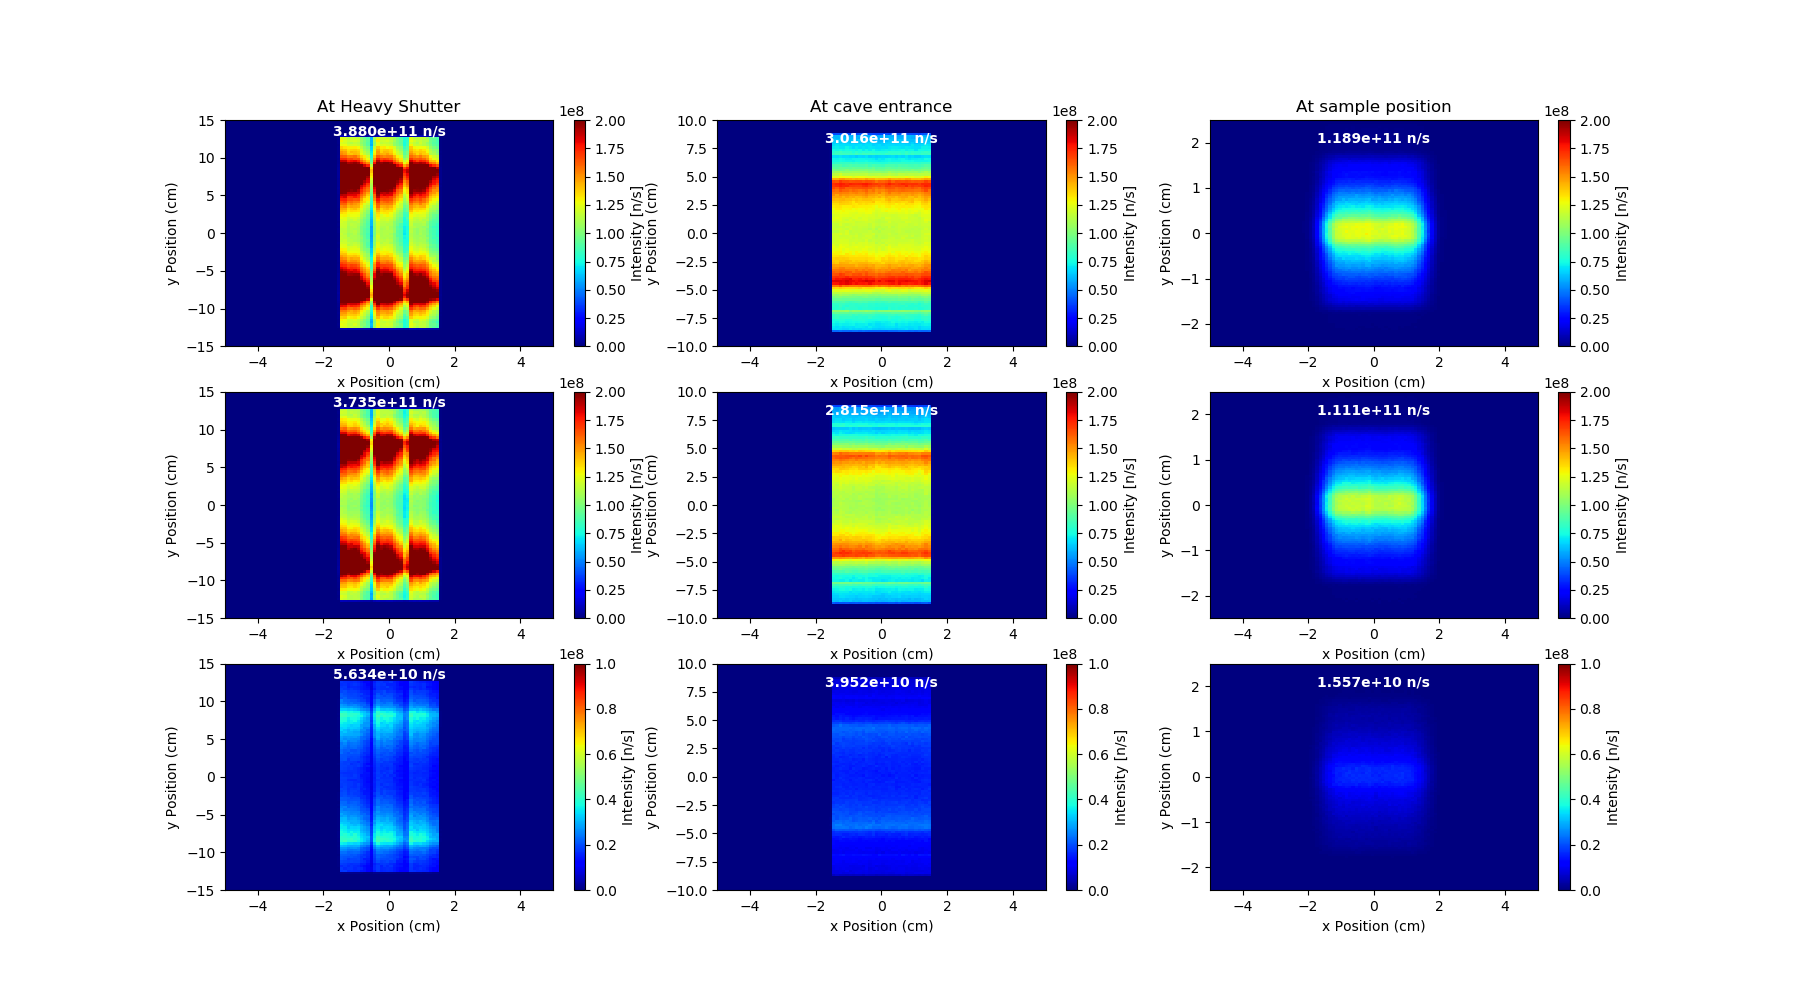

Heavy shutter
No choppers total flux = 3.880e+11 n/s
WBC but no WFM total flux  = 3.735e+11 n/s
All choppers total flux  = 5.634e+10 n/s
 
Bunker exit
No choppers total flux = 3.323e+11 n/s
WBC but no WFM total flux  = 3.188e+11 n/s
All choppers total flux  = 4.899e+10 n/s
 
Cave entrance
No choppers total flux = 3.016e+11 n/s
WBC but no WFM total flux  = 2.815e+11 n/s
All choppers total flux  = 3.952e+10 n/s
 
Sample position
No choppers total flux = 1.189e+11 n/s
WBC but no WFM total flux  = 1.111e+11 n/s
All choppers total flux  = 1.557e+10 n/s


In [4]:
#Plot PSD monitors

plt.figure(figsize=(18,10))

plt.subplot(3,3,1)
plt.imshow(plot4a_nowbc,cmap='jet',origin='lower',aspect='auto',extent=(-5,5,-15,15),vmin=0, vmax=2e8)
plt.title("At Heavy Shutter")
plt.ylabel('y Position (cm)')
plt.xlabel('x Position (cm)')
plt.colorbar().set_label('Intensity [n/s]')
#plt.xlim(xmin=-3, xmax=3)

ax = plt.gca()
ax.text(0,13,"{0:.3e} n/s".format(plot4a_nowbc.sum()),ha='center',color='w',weight='bold')


plt.subplot(3,3,2)
plt.imshow(plot4c_nowbc,cmap='jet',origin='lower',aspect='auto',extent=(-5,5,-10,10),vmin=0, vmax=2e8)
plt.title("At cave entrance")
plt.ylabel('y Position (cm)')
plt.xlabel('x Position (cm)')
plt.colorbar().set_label('Intensity [n/s]')
#plt.xlim(xmin=-3, xmax=3)

ax = plt.gca()
ax.text(0,8,"{0:.3e} n/s".format(plot4c_nowbc.sum()),ha='center',color='w',weight='bold')

plt.subplot(3,3,3)
plt.imshow(plot4e_nowbc,cmap='jet',origin='lower',aspect='auto',extent=(-5,5,-2.5,2.5),vmin=0, vmax=2e8)
plt.title("At sample position")
plt.ylabel('y Position (cm)')
plt.xlabel('x Position (cm)')
plt.colorbar().set_label('Intensity [n/s]')
#plt.xlim(xmin=-3, xmax=3)

ax = plt.gca()
ax.text(0,2,"{0:.3e} n/s".format(plot4e_nowbc.sum()),ha='center',color='w',weight='bold')

plt.subplot(3,3,4)
plt.imshow(plot4a_nowfm,cmap='jet',origin='lower',aspect='auto',extent=(-5,5,-15,15),vmin=0, vmax=2e8)
#plt.title("At Heavy Shutter")
plt.ylabel('y Position (cm)')
plt.xlabel('x Position (cm)')
plt.colorbar().set_label('Intensity [n/s]')
#plt.xlim(xmin=-3, xmax=3)

ax = plt.gca()
ax.text(0,13,"{0:.3e} n/s".format(plot4a_nowfm.sum()),ha='center',color='w',weight='bold')


plt.subplot(3,3,5)
plt.imshow(plot4c_nowfm,cmap='jet',origin='lower',aspect='auto',extent=(-5,5,-10,10),vmin=0, vmax=2e8)
#plt.title("At cave entrance")
plt.ylabel('y Position (cm)')
plt.xlabel('x Position (cm)')
plt.colorbar().set_label('Intensity [n/s]')
#plt.xlim(xmin=-3, xmax=3)

ax = plt.gca()
ax.text(0,8,"{0:.3e} n/s".format(plot4c_nowfm.sum()),ha='center',color='w',weight='bold')

plt.subplot(3,3,6)
plt.imshow(plot4e_nowfm,cmap='jet',origin='lower',aspect='auto',extent=(-5,5,-2.5,2.5),vmin=0, vmax=2e8)
#plt.title("At sample position")
plt.ylabel('y Position (cm)')
plt.xlabel('x Position (cm)')
plt.colorbar().set_label('Intensity [n/s]')
#plt.xlim(xmin=-3, xmax=3)

ax = plt.gca()
ax.text(0,2,"{0:.3e} n/s".format(plot4e_nowfm.sum()),ha='center',color='w',weight='bold')

plt.subplot(3,3,7)
plt.imshow(plot4a_chop,cmap='jet',origin='lower',aspect='auto',extent=(-5,5,-15,15),vmin=0, vmax=1e8)
#plt.title("At Heavy Shutter")
plt.ylabel('y Position (cm)')
plt.xlabel('x Position (cm)')
plt.colorbar().set_label('Intensity [n/s]')
#plt.xlim(xmin=-3, xmax=3)

ax = plt.gca()
ax.text(0,13,"{0:.3e} n/s".format(plot4a_chop.sum()),ha='center',color='w',weight='bold')


plt.subplot(3,3,8)
plt.imshow(plot4c_chop,cmap='jet',origin='lower',aspect='auto',extent=(-5,5,-10,10),vmin=0, vmax=1e8)
#plt.title("At cave entrance")
plt.ylabel('y Position (cm)')
plt.xlabel('x Position (cm)')
plt.colorbar().set_label('Intensity [n/s]')
#plt.xlim(xmin=-3, xmax=3)

ax = plt.gca()
ax.text(0,8,"{0:.3e} n/s".format(plot4c_chop.sum()),ha='center',color='w',weight='bold')

plt.subplot(3,3,9)
plt.imshow(plot4e_chop,cmap='jet',origin='lower',aspect='auto',extent=(-5,5,-2.5,2.5),vmin=0, vmax=1e8)
#plt.title("At sample position")
plt.ylabel('y Position (cm)')
plt.xlabel('x Position (cm)')
plt.colorbar().set_label('Intensity [n/s]')
#plt.xlim(xmin=-3, xmax=3)

ax = plt.gca()
ax.text(0,2,"{0:.3e} n/s".format(plot4e_chop.sum()),ha='center',color='w',weight='bold')

print "Heavy shutter"
print "No choppers total flux = {0:.3e} n/s".format(plot4a_nowbc.sum())
print "WBC but no WFM total flux  = {0:.3e} n/s".format(plot4a_nowfm.sum())
print "All choppers total flux  = {0:.3e} n/s".format(plot4a_chop.sum())
print " "
print "Bunker exit"
print "No choppers total flux = {0:.3e} n/s".format(plot4b_nowbc.sum())
print "WBC but no WFM total flux  = {0:.3e} n/s".format(plot4b_nowfm.sum())
print "All choppers total flux  = {0:.3e} n/s".format(plot4b_chop.sum())
print " "
print "Cave entrance"
print "No choppers total flux = {0:.3e} n/s".format(plot4c_nowbc.sum())
print "WBC but no WFM total flux  = {0:.3e} n/s".format(plot4c_nowfm.sum())
print "All choppers total flux  = {0:.3e} n/s".format(plot4c_chop.sum())
print " "
print "Sample position"
print "No choppers total flux = {0:.3e} n/s".format(plot4e_nowbc.sum())
print "WBC but no WFM total flux  = {0:.3e} n/s".format(plot4e_nowfm.sum())
print "All choppers total flux  = {0:.3e} n/s".format(plot4e_chop.sum())



<IPython.core.display.Javascript object>


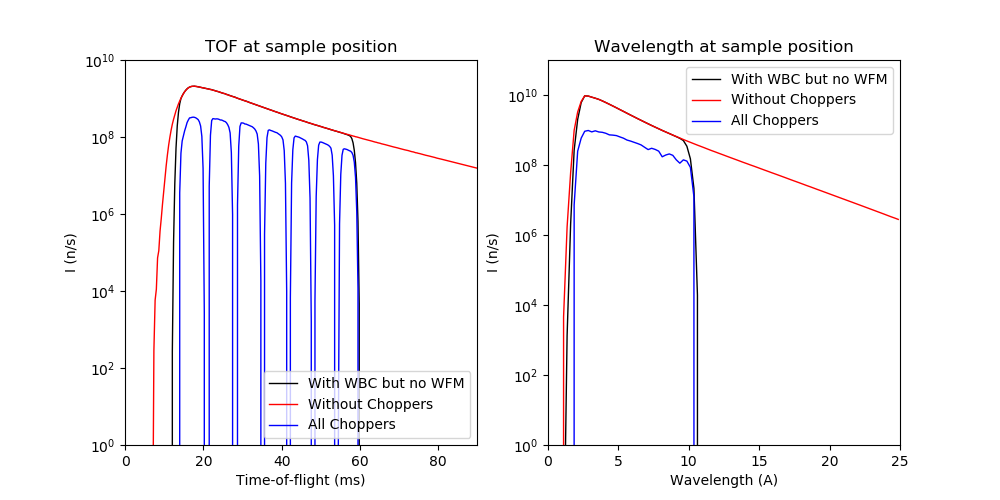

In [132]:
#Wavelength and TOF Spectrum

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.semilogy(plot2_nowfm_tof/1000,plot2_nowfm_i,label='With WBC but no WFM',c='black',linewidth=1)
plt.semilogy(plot2_nowbc_tof/1000,plot2_nowbc_i,label='Without Choppers',c='red',linewidth=1)
plt.semilogy(plot2_chop_tof/1000,plot2_chop_i,label='All Choppers',c='blue',linewidth=1)
plt.xlim(xmin=0,xmax=90)
plt.title("TOF at sample position")
plt.ylabel('I (n/s)')
plt.xlabel('Time-of-flight (ms)')
plt.ylim(ymin=10e-1,ymax=1e10)
plt.legend()


plt.subplot(1,2,2)
plt.semilogy(plot3lambda_nowfm_lambda,plot3lambda_nowfm_i,label='With WBC but no WFM',c='black',linewidth=1)
plt.semilogy(plot3lambda_nowbc_lambda,plot3lambda_nowbc_i,label='Without Choppers',c='red',linewidth=1)
plt.semilogy(plot3lambda_chop_lambda,plot3lambda_chop_i,label='All Choppers',c='blue',linewidth=1)
plt.xlim(xmin=0, xmax=25)
plt.title("Wavelength at sample position")
plt.ylabel('I (n/s)')
plt.xlabel('Wavelength (A)')
plt.ylim(ymin=10e-1,ymax=1e11)
plt.legend()


40 0.002 0.0909090909091
22


<IPython.core.display.Javascript object>


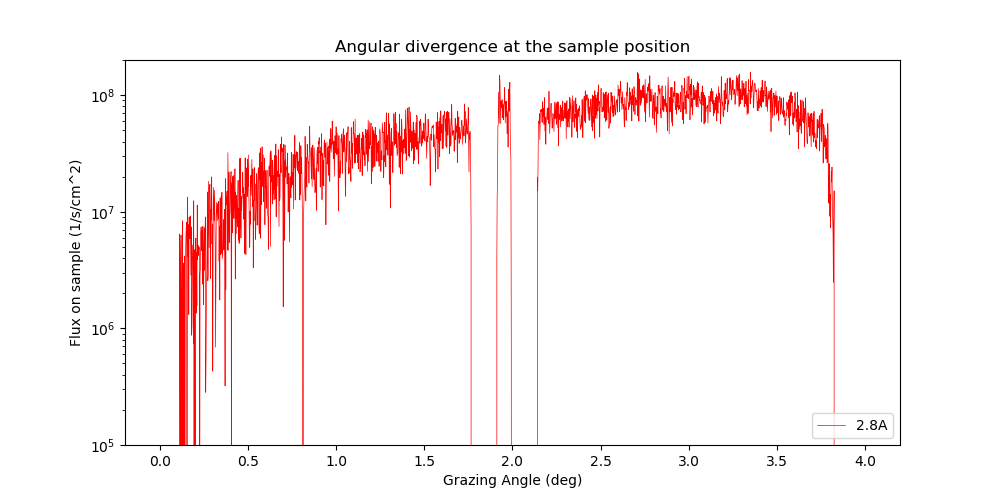

Text(0.5,1,'Angular divergence at the sample position')

In [124]:
# Divergence at the sample position

#Area of detector in mcstas is 10 x 4 cm
area = 40
anglebinsize = (4.0/2000)
wavelengthbinsize = (12.0-1.0)/121.0

print area,anglebinsize,wavelengthbinsize

scaling = area*anglebinsize*wavelengthbinsize

def getlambdaindex(wavelength):
    return int(np.round((wavelength-1.0)*121.0/(12.0-1.0)))

print getlambdaindex(3.0)

grazing_angle = np.linspace(1e-3,4,num=2000)

plt.figure(figsize=(10,5))
plt.subplot(1,1,1)
plt.semilogy(grazing_angle,plot1_nowbc[::-1,getlambdaindex(2.8)]/scaling,label='2.8A',c='red',linewidth=0.5)
#plt.semilogy(grazing_angle,plot1_nowbc[::-1,getlambdaindex(4.0)]/scaling,label='4A',c='black',linewidth=0.5)
#plt.semilogy(grazing_angle,plot1_nowbc[::-1,getlambdaindex(6.0)]/scaling,label='6A',c='blue',linewidth=0.5)
#plt.semilogy(grazing_angle,plot1_nowbc[::-1,getlambdaindex(8.0)]/scaling,label='8A',c='green',linewidth=0.5)
plt.xlabel('Grazing Angle (deg)')
plt.ylabel('Flux on sample (1/s/cm^2)')
plt.ylim(ymin=1e5,ymax=2e8)
plt.legend(loc=4)
plt.title('Angular divergence at the sample position')



No choppers 3 x 1 cm rate = 1.817e+10 n/s/cm^2
WBC but no WFM 3 x 1 cm rate = 1.702e+10 n/s/cm^2
All choppers 3 x 1 cm rate = 2.372e+09 n/s/cm^2
No choppers total flux = 1.189e+11 n/s
WBC but no WFM total flux  = 1.111e+11 n/s
All choppers total flux  = 1.557e+10 n/s


<IPython.core.display.Javascript object>


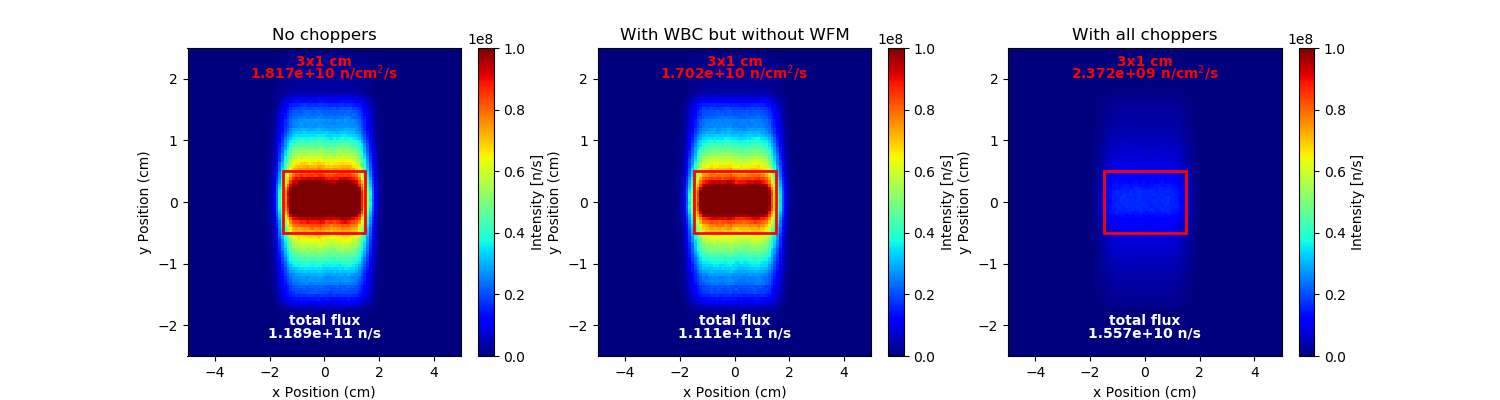

Text(0,-2.2,'1.557e+10 n/s')

In [131]:
## Flux at the sample position

#Total size is 10 x 5 cm / 100 x 100 pixels
#x_pixel = 10/100 # in cm
#y_pixel = 5/100 # in cm

px_size = 0.1 #cm
py_size = 0.05 #cm

#Area of 3x1 cm
#based on size that is 3.5 cm to 6.5 cm horizontal and 1.5 cm to 3.5 cm vertical
nowfm_focusrate = plot4e_nowfm[int(3.5/px_size):int(6.5/px_size),int(2/py_size):int(3/py_size)].sum()/3
nowbc_focusrate = plot4e_nowbc[int(3.5/px_size):int(6.5/px_size),int(2/py_size):int(3/py_size)].sum()/3
chop_focusrate = plot4e_chop[int(3.5/px_size):int(6.5/px_size),int(2/py_size):int(3/py_size)].sum()/3

#print "Whole area rate No WFM = {0:.3e} n/s".format(plot0b_nowfm.sum())
print "No choppers 3 x 1 cm rate = {0:.3e} n/s/cm^2".format(nowbc_focusrate)
print "WBC but no WFM 3 x 1 cm rate = {0:.3e} n/s/cm^2".format(nowfm_focusrate)
print "All choppers 3 x 1 cm rate = {0:.3e} n/s/cm^2".format(chop_focusrate)

print "No choppers total flux = {0:.3e} n/s".format(plot4e_nowbc.sum())
print "WBC but no WFM total flux  = {0:.3e} n/s".format(plot4e_nowfm.sum())
print "All choppers total flux  = {0:.3e} n/s".format(plot4e_chop.sum())

plt.figure(figsize=(15,4))

plt.subplot(1,3,2)
plt.imshow(plot4e_nowfm,cmap='jet',origin='lower',aspect='auto',extent=(-5,5,-2.5,2.5),vmin=0, vmax=1e8)
plt.title("With WBC but without WFM")
plt.ylabel('y Position (cm)')
plt.xlabel('x Position (cm)')
plt.colorbar().set_label('Intensity [n/s]')
ax = plt.gca()

#draw a box 3x1 cm
rect1 = mp.patches.Rectangle((1.5,-0.5),-3,1,linewidth=2,edgecolor='r',facecolor='none')

ax.add_patch(rect1)
ax.text(0,2.2,"3x1 cm",ha='center',color='r',weight='bold')
ax.text(0,2,r"{0:.3e} n/cm$^2$/s".format( nowfm_focusrate),ha='center',color='r',weight='bold')
ax.text(0,-2,"total flux",ha='center',color='w',weight='bold')
ax.text(0,-2.2,r"{0:.3e} n/s".format(plot4e_nowfm.sum()),ha='center',color='w',weight='bold')


plt.subplot(1,3,1)
plt.imshow(plot4e_nowbc,cmap='jet',origin='lower',aspect='auto',extent=(-5,5,-2.5,2.5),vmin=0, vmax=1e8)
plt.title("No choppers")
plt.ylabel('y Position (cm)')
plt.xlabel('x Position (cm)')
plt.colorbar().set_label('Intensity [n/s]')
ax = plt.gca()

rect2 = mp.patches.Rectangle((1.5,-0.5),-3,1,linewidth=2,edgecolor='r',facecolor='none')

ax.add_patch(rect2)
ax.text(0,2.2,"3x1 cm",ha='center',color='r',weight='bold')
ax.text(0,2,r"{0:.3e} n/cm$^2$/s".format( nowbc_focusrate),ha='center',color='r',weight='bold')
ax.text(0,-2,"total flux",ha='center',color='w',weight='bold')
ax.text(0,-2.2,r"{0:.3e} n/s".format(plot4e_nowbc.sum()),ha='center',color='w',weight='bold')


plt.subplot(1,3,3)
plt.imshow(plot4e_chop,cmap='jet',origin='lower',aspect='auto',extent=(-5,5,-2.5,2.5),vmin=0, vmax=1e8)
plt.title("With all choppers")
plt.ylabel('y Position (cm)')
plt.xlabel('x Position (cm)')
plt.colorbar().set_label('Intensity [n/s]')
ax = plt.gca()

rect2 = mp.patches.Rectangle((1.5,-0.5),-3,1,linewidth=2,edgecolor='r',facecolor='none')

ax.add_patch(rect2)
ax.text(0,2.2,"3x1 cm",ha='center',color='r',weight='bold')
ax.text(0,2,r"{0:.3e} n/cm$^2$/s".format(chop_focusrate),ha='center',color='r',weight='bold')
ax.text(0,-2,"total flux",ha='center',color='w',weight='bold')
ax.text(0,-2.2,r"{0:.3e} n/s".format(plot4e_chop.sum()),ha='center',color='w',weight='bold')



No choppers 3 x 25.25 cm rate = 1.402e+09 n/s/cm^2
WBC but no WFM 3 x 25.25 cm rate = 1.342e+09 n/s/cm^2
All choppers 3 x 25.25 cm rate = 2.103e+08 n/s/cm^2
No choppers total flux = 3.880e+11 n/s
WBC but no WFM total flux  = 3.735e+11 n/s
All choppers total flux  = 5.634e+10 n/s


<IPython.core.display.Javascript object>


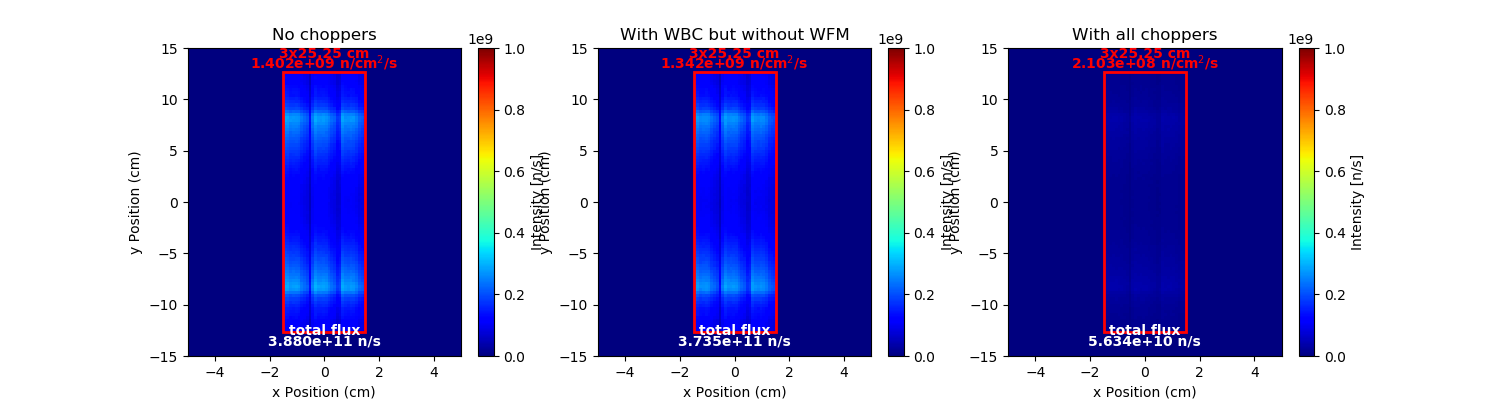

Text(0,-14,'5.634e+10 n/s')

In [154]:
## Flux at the heavy shutter

#Total size is 10 x 30 cm / 100 x 100 pixels
#x_pixel = 10/100 # in cm
#y_pixel = 30/100 # in cm

px_size = 0.1 #cm
py_size = 0.3333333 #cm

#Area of 3x25.25 cm
#based on size that is 3.5 cm to 6.5 cm horizontal and 2.375 cm to 27.625 cm vertical
nowfm_focusrate = plot4a_nowfm[int(3.5/px_size):int(6.5/px_size),int(2.375/py_size):int(27.625/py_size)].sum()/75.75
nowbc_focusrate = plot4a_nowbc[int(3.5/px_size):int(6.5/px_size),int(2.375/py_size):int(27.625/py_size)].sum()/75.75
chop_focusrate = plot4a_chop[int(3.5/px_size):int(6.5/px_size),int(2.375/py_size):int(27.625/py_size)].sum()/75.75

#print "Whole area rate No WFM = {0:.3e} n/s".format(plot0b_nowfm.sum())
print "No choppers 3 x 25.25 cm rate = {0:.3e} n/s/cm^2".format(nowbc_focusrate)
print "WBC but no WFM 3 x 25.25 cm rate = {0:.3e} n/s/cm^2".format(nowfm_focusrate)
print "All choppers 3 x 25.25 cm rate = {0:.3e} n/s/cm^2".format(chop_focusrate)

print "No choppers total flux = {0:.3e} n/s".format(plot4a_nowbc.sum())
print "WBC but no WFM total flux  = {0:.3e} n/s".format(plot4a_nowfm.sum())
print "All choppers total flux  = {0:.3e} n/s".format(plot4a_chop.sum())

plt.figure(figsize=(15,4))

plt.subplot(1,3,2)
plt.imshow(plot4a_nowfm,cmap='jet',origin='lower',aspect='auto',extent=(-5,5,-15,15),vmin=0, vmax=1e9)
plt.title("With WBC but without WFM")
plt.ylabel('y Position (cm)')
plt.xlabel('x Position (cm)')
plt.colorbar().set_label('Intensity [n/s]')
ax = plt.gca()

#draw a box 3x25.25 cm
rect1 = mp.patches.Rectangle((1.5,-12.625),-3,25.25,linewidth=2,edgecolor='r',facecolor='none')

ax.add_patch(rect1)
ax.text(0,14,"3x25.25 cm",ha='center',color='r',weight='bold')
ax.text(0,13,r"{0:.3e} n/cm$^2$/s".format( nowfm_focusrate),ha='center',color='r',weight='bold')
ax.text(0,-13,"total flux",ha='center',color='w',weight='bold')
ax.text(0,-14,r"{0:.3e} n/s".format(plot4a_nowfm.sum()),ha='center',color='w',weight='bold')


plt.subplot(1,3,1)
plt.imshow(plot4a_nowbc,cmap='jet',origin='lower',aspect='auto',extent=(-5,5,-15,15),vmin=0, vmax=1e9)
plt.title("No choppers")
plt.ylabel('y Position (cm)')
plt.xlabel('x Position (cm)')
plt.colorbar().set_label('Intensity [n/s]')
ax = plt.gca()

rect2 = mp.patches.Rectangle((1.5,-12.625),-3,25.25,linewidth=2,edgecolor='r',facecolor='none')

ax.add_patch(rect2)
ax.text(0,14,"3x25.25 cm",ha='center',color='r',weight='bold')
ax.text(0,13,r"{0:.3e} n/cm$^2$/s".format( nowbc_focusrate),ha='center',color='r',weight='bold')
ax.text(0,-13,"total flux",ha='center',color='w',weight='bold')
ax.text(0,-14,r"{0:.3e} n/s".format(plot4a_nowbc.sum()),ha='center',color='w',weight='bold')


plt.subplot(1,3,3)
plt.imshow(plot4a_chop,cmap='jet',origin='lower',aspect='auto',extent=(-5,5,-15,15),vmin=0, vmax=1e9)
plt.title("With all choppers")
plt.ylabel('y Position (cm)')
plt.xlabel('x Position (cm)')
plt.colorbar().set_label('Intensity [n/s]')
ax = plt.gca()

rect2 = mp.patches.Rectangle((1.5,-12.625),-3,25.25,linewidth=2,edgecolor='r',facecolor='none')

ax.add_patch(rect2)
ax.text(0,14,"3x25.25 cm",ha='center',color='r',weight='bold')
ax.text(0,13,r"{0:.3e} n/cm$^2$/s".format(chop_focusrate),ha='center',color='r',weight='bold')
ax.text(0,-13,"total flux",ha='center',color='w',weight='bold')
ax.text(0,-14,r"{0:.3e} n/s".format(plot4a_chop.sum()),ha='center',color='w',weight='bold')



No choppers 3 x 24.2 cm rate = 1.645e+09 n/s/cm^2
WBC but no WFM 3 x 24.2 cm rate = 1.573e+09 n/s/cm^2
All choppers 3 x 24.2 cm rate = 2.485e+08 n/s/cm^2
No choppers total flux = 3.323e+11 n/s
WBC but no WFM total flux  = 3.188e+11 n/s
All choppers total flux  = 4.899e+10 n/s


<IPython.core.display.Javascript object>


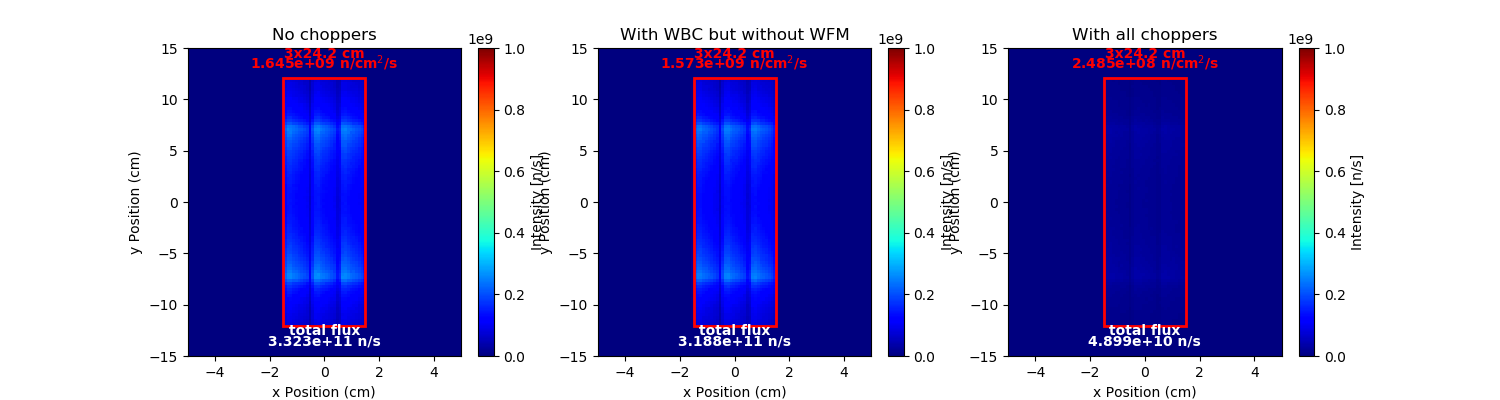

Text(0,-14,'4.899e+10 n/s')

In [153]:
## Flux at the bunker exit

#Total size is 10 x 30 cm / 100 x 100 pixels
#x_pixel = 10/100 # in cm
#y_pixel = 30/100 # in cm

px_size = 0.1 #cm
py_size = 0.3333333 #cm

#Area of 3x24.2 cm
#based on size that is 3.5 cm to 6.5 cm horizontal and 2.9 cm to 27.1 cm vertical
nowfm_focusrate = plot4b_nowfm[int(3.5/px_size):int(6.5/px_size),int(2.9/py_size):int(27.1/py_size)].sum()/72.6
nowbc_focusrate = plot4b_nowbc[int(3.5/px_size):int(6.5/px_size),int(2.9/py_size):int(27.1/py_size)].sum()/72.6
chop_focusrate = plot4b_chop[int(3.5/px_size):int(6.5/px_size),int(2.9/py_size):int(27.1/py_size)].sum()/72.6

#print "Whole area rate No WFM = {0:.3e} n/s".format(plot0b_nowfm.sum())
print "No choppers 3 x 24.2 cm rate = {0:.3e} n/s/cm^2".format(nowbc_focusrate)
print "WBC but no WFM 3 x 24.2 cm rate = {0:.3e} n/s/cm^2".format(nowfm_focusrate)
print "All choppers 3 x 24.2 cm rate = {0:.3e} n/s/cm^2".format(chop_focusrate)

print "No choppers total flux = {0:.3e} n/s".format(plot4b_nowbc.sum())
print "WBC but no WFM total flux  = {0:.3e} n/s".format(plot4b_nowfm.sum())
print "All choppers total flux  = {0:.3e} n/s".format(plot4b_chop.sum())

plt.figure(figsize=(15,4))

plt.subplot(1,3,2)
plt.imshow(plot4b_nowfm,cmap='jet',origin='lower',aspect='auto',extent=(-5,5,-15,15),vmin=0, vmax=1e9)
plt.title("With WBC but without WFM")
plt.ylabel('y Position (cm)')
plt.xlabel('x Position (cm)')
plt.colorbar().set_label('Intensity [n/s]')
ax = plt.gca()

#draw a box 3x25.25 cm
rect1 = mp.patches.Rectangle((1.5,-12.1),-3,24.2,linewidth=2,edgecolor='r',facecolor='none')

ax.add_patch(rect1)
ax.text(0,14,"3x24.2 cm",ha='center',color='r',weight='bold')
ax.text(0,13,r"{0:.3e} n/cm$^2$/s".format( nowfm_focusrate),ha='center',color='r',weight='bold')
ax.text(0,-13,"total flux",ha='center',color='w',weight='bold')
ax.text(0,-14,r"{0:.3e} n/s".format(plot4b_nowfm.sum()),ha='center',color='w',weight='bold')


plt.subplot(1,3,1)
plt.imshow(plot4b_nowbc,cmap='jet',origin='lower',aspect='auto',extent=(-5,5,-15,15),vmin=0, vmax=1e9)
plt.title("No choppers")
plt.ylabel('y Position (cm)')
plt.xlabel('x Position (cm)')
plt.colorbar().set_label('Intensity [n/s]')
ax = plt.gca()

rect2 = mp.patches.Rectangle((1.5,-12.1),-3,24.2,linewidth=2,edgecolor='r',facecolor='none')

ax.add_patch(rect2)
ax.text(0,14,"3x24.2 cm",ha='center',color='r',weight='bold')
ax.text(0,13,r"{0:.3e} n/cm$^2$/s".format( nowbc_focusrate),ha='center',color='r',weight='bold')
ax.text(0,-13,"total flux",ha='center',color='w',weight='bold')
ax.text(0,-14,r"{0:.3e} n/s".format(plot4b_nowbc.sum()),ha='center',color='w',weight='bold')


plt.subplot(1,3,3)
plt.imshow(plot4b_chop,cmap='jet',origin='lower',aspect='auto',extent=(-5,5,-15,15),vmin=0, vmax=1e9)
plt.title("With all choppers")
plt.ylabel('y Position (cm)')
plt.xlabel('x Position (cm)')
plt.colorbar().set_label('Intensity [n/s]')
ax = plt.gca()

rect2 = mp.patches.Rectangle((1.5,-12.1),-3,24.2,linewidth=2,edgecolor='r',facecolor='none')

ax.add_patch(rect2)
ax.text(0,14,"3x24.2 cm",ha='center',color='r',weight='bold')
ax.text(0,13,r"{0:.3e} n/cm$^2$/s".format(chop_focusrate),ha='center',color='r',weight='bold')
ax.text(0,-13,"total flux",ha='center',color='w',weight='bold')
ax.text(0,-14,r"{0:.3e} n/s".format(plot4b_chop.sum()),ha='center',color='w',weight='bold')



No choppers 3 x 18.5 cm rate = 2.049e+09 n/s/cm^2
WBC but no WFM 3 x 18.5 cm rate = 1.922e+09 n/s/cm^2
All choppers 3 x 18.5 cm rate = 2.694e+08 n/s/cm^2
No choppers total flux = 3.016e+11 n/s
WBC but no WFM total flux  = 2.815e+11 n/s
All choppers total flux  = 3.952e+10 n/s


<IPython.core.display.Javascript object>


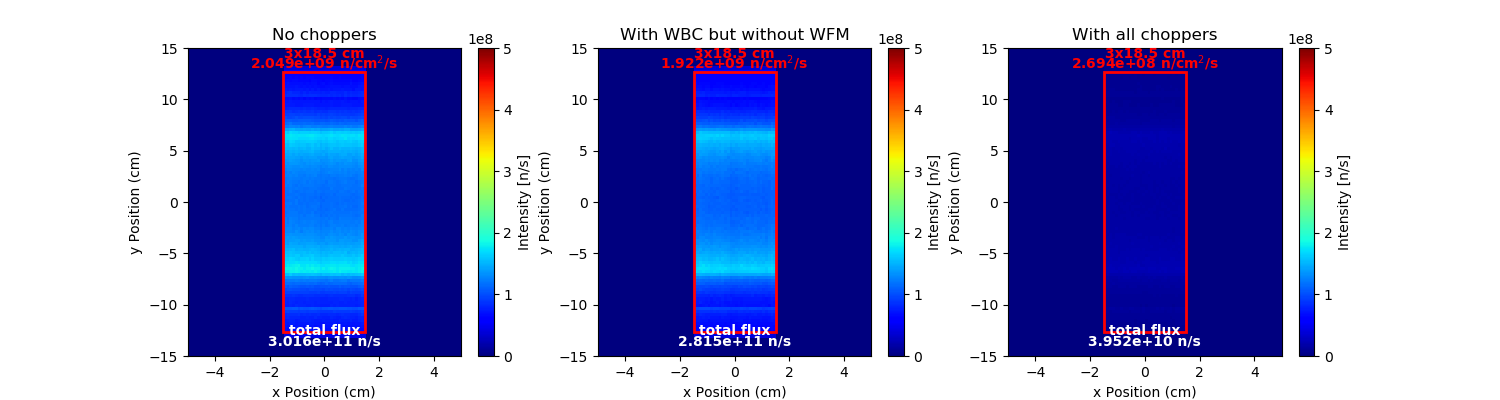

Text(0,-14,'3.952e+10 n/s')

In [5]:
## Flux at the cave entrance

#Total size is 10 x 20 cm / 100 x 100 pixels
#x_pixel = 10/100 # in cm
#y_pixel = 20/100 # in cm

px_size = 0.1 #cm
py_size = 0.2 #cm

#Area of 3x18.5 cm
#based on size that is 3.5 cm to 6.5 cm horizontal and 0.75 cm to 19.25 cm vertical
nowfm_focusrate = plot4c_nowfm[int(3.5/px_size):int(6.5/px_size),int(0.75/py_size):int(19.25/py_size)].sum()/55.5
nowbc_focusrate = plot4c_nowbc[int(3.5/px_size):int(6.5/px_size),int(0.75/py_size):int(19.25/py_size)].sum()/55.5
chop_focusrate = plot4c_chop[int(3.5/px_size):int(6.5/px_size),int(0.75/py_size):int(19.25/py_size)].sum()/55.5

#print "Whole area rate No WFM = {0:.3e} n/s".format(plot0b_nowfm.sum())
print "No choppers 3 x 18.5 cm rate = {0:.3e} n/s/cm^2".format(nowbc_focusrate)
print "WBC but no WFM 3 x 18.5 cm rate = {0:.3e} n/s/cm^2".format(nowfm_focusrate)
print "All choppers 3 x 18.5 cm rate = {0:.3e} n/s/cm^2".format(chop_focusrate)

print "No choppers total flux = {0:.3e} n/s".format(plot4c_nowbc.sum())
print "WBC but no WFM total flux  = {0:.3e} n/s".format(plot4c_nowfm.sum())
print "All choppers total flux  = {0:.3e} n/s".format(plot4c_chop.sum())

plt.figure(figsize=(15,4))

plt.subplot(1,3,2)
plt.imshow(plot4c_nowfm,cmap='jet',origin='lower',aspect='auto',extent=(-5,5,-15,15),vmin=0, vmax=5e8)
plt.title("With WBC but without WFM")
plt.ylabel('y Position (cm)')
plt.xlabel('x Position (cm)')
plt.colorbar().set_label('Intensity [n/s]')
ax = plt.gca()

#draw a box 3x25.25 cm
rect1 = mp.patches.Rectangle((1.5,-12.625),-3,25.25,linewidth=2,edgecolor='r',facecolor='none')

ax.add_patch(rect1)
ax.text(0,14,"3x18.5 cm",ha='center',color='r',weight='bold')
ax.text(0,13,r"{0:.3e} n/cm$^2$/s".format( nowfm_focusrate),ha='center',color='r',weight='bold')
ax.text(0,-13,"total flux",ha='center',color='w',weight='bold')
ax.text(0,-14,r"{0:.3e} n/s".format(plot4c_nowfm.sum()),ha='center',color='w',weight='bold')


plt.subplot(1,3,1)
plt.imshow(plot4c_nowbc,cmap='jet',origin='lower',aspect='auto',extent=(-5,5,-15,15),vmin=0, vmax=5e8)
plt.title("No choppers")
plt.ylabel('y Position (cm)')
plt.xlabel('x Position (cm)')
plt.colorbar().set_label('Intensity [n/s]')
ax = plt.gca()

rect2 = mp.patches.Rectangle((1.5,-12.625),-3,25.25,linewidth=2,edgecolor='r',facecolor='none')

ax.add_patch(rect2)
ax.text(0,14,"3x18.5 cm",ha='center',color='r',weight='bold')
ax.text(0,13,r"{0:.3e} n/cm$^2$/s".format( nowbc_focusrate),ha='center',color='r',weight='bold')
ax.text(0,-13,"total flux",ha='center',color='w',weight='bold')
ax.text(0,-14,r"{0:.3e} n/s".format(plot4c_nowbc.sum()),ha='center',color='w',weight='bold')


plt.subplot(1,3,3)
plt.imshow(plot4c_chop,cmap='jet',origin='lower',aspect='auto',extent=(-5,5,-15,15),vmin=0, vmax=5e8)
plt.title("With all choppers")
plt.ylabel('y Position (cm)')
plt.xlabel('x Position (cm)')
plt.colorbar().set_label('Intensity [n/s]')
ax = plt.gca()

rect2 = mp.patches.Rectangle((1.5,-12.625),-3,25.25,linewidth=2,edgecolor='r',facecolor='none')

ax.add_patch(rect2)
ax.text(0,14,"3x18.5 cm",ha='center',color='r',weight='bold')
ax.text(0,13,r"{0:.3e} n/cm$^2$/s".format(chop_focusrate),ha='center',color='r',weight='bold')
ax.text(0,-13,"total flux",ha='center',color='w',weight='bold')
ax.text(0,-14,r"{0:.3e} n/s".format(plot4c_chop.sum()),ha='center',color='w',weight='bold')

